In [1]:
!pip install svgpathtools numpy scipy

     -------------------------------------- 67.4/67.4 kB 524.8 kB/s eta 0:00:00
     -------------------------------------- 67.1/67.1 kB 729.3 kB/s eta 0:00:00


In [2]:
from svgpathtools import svg2paths

# Load the SVG file
file_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.svg"
paths, attributes = svg2paths(file_path)


In [3]:
import numpy as np

# Function to sample points from paths
def sample_points_from_paths(paths, num_points=100):
    all_points = []
    for path in paths:
        points = []
        for i in np.linspace(0, len(path), num_points):
            point = path.point(i / len(path))
            points.append([point.real, point.imag])
        all_points.append(np.array(points))
    return all_points

# Extract points from SVG paths
all_points = sample_points_from_paths(paths)

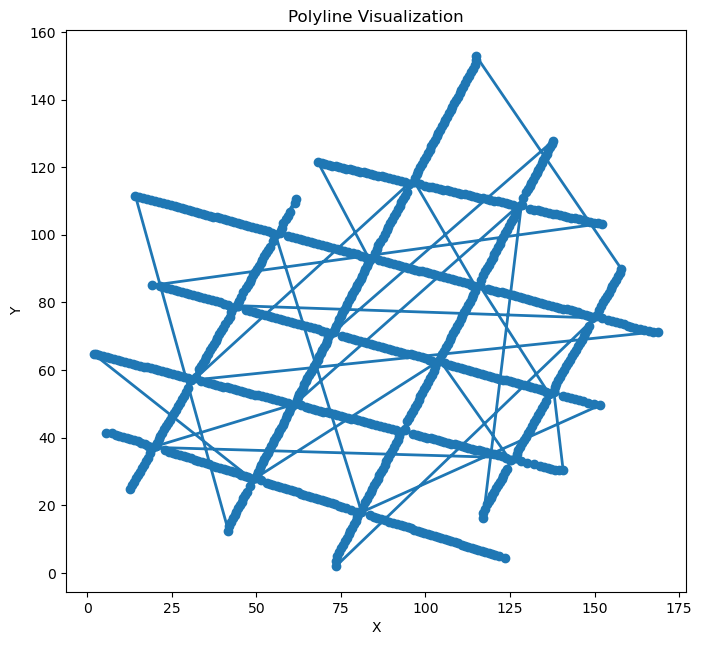

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file without headers
csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag2.csv"
points_df = pd.read_csv(csv_path, header=None)

# Extract x and y coordinates based on the structure of your data
# Assuming x and y coordinates are in the last two columns
x = points_df.iloc[:, -2].values
y = points_df.iloc[:, -1].values

# Combine x and y into a single array of points
points = np.vstack((x, y)).T

# Visualize the points
plt.figure(figsize=(8, 8))
plt.plot(points[:, 0], points[:, 1], 'o-', linewidth=2)
plt.title('Polyline Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


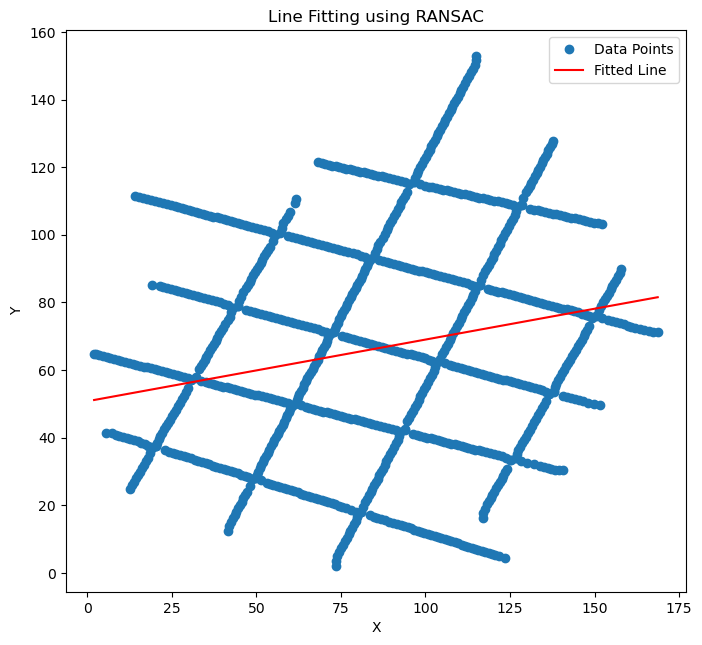

Number of inliers:  498
Number of outliers:  466
Mean Squared Error:  216.46731402551154


In [3]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

# Fit a line using RANSAC
ransac = RANSACRegressor()
ransac.fit(points[:, 0].reshape(-1, 1), points[:, 1])

# Predict values
line_x = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
line_y = ransac.predict(line_x.reshape(-1, 1))

# Visualize the result
plt.figure(figsize=(8, 8))
plt.plot(points[:, 0], points[:, 1], 'o', label='Data Points')
plt.plot(line_x, line_y, 'r-', label='Fitted Line')
plt.title('Line Fitting using RANSAC')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Check the inliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print("Number of inliers: ", inlier_mask.sum())
print("Number of outliers: ", outlier_mask.sum())

# Mean squared error for the fitted line
mse = mean_squared_error(points[inlier_mask][:, 1], ransac.predict(points[inlier_mask][:, 0].reshape(-1, 1)))
print("Mean Squared Error: ", mse)


Symmetry detection threshold:  66.46208261769102
Average distance to symmetry axis:  66.46208261769102


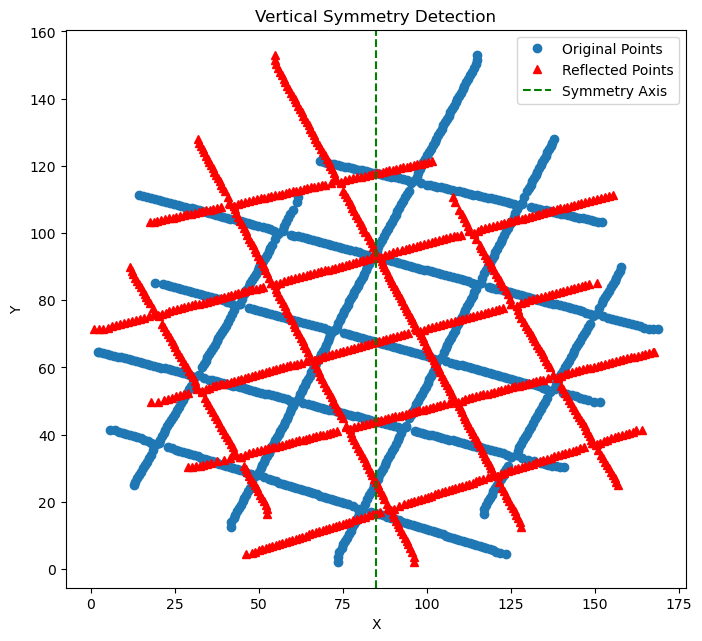

In [4]:
# Compute the mean x-coordinate
mean_x = np.mean(points[:, 0])

# Reflect points across the mean x-axis and compare
reflected_points = points.copy()
reflected_points[:, 0] = 2 * mean_x - reflected_points[:, 0]

# Compute distances between original and reflected points
distances = np.linalg.norm(points - reflected_points, axis=1)

# Set a threshold for symmetry detection
threshold = np.mean(distances)

print("Symmetry detection threshold: ", threshold)
print("Average distance to symmetry axis: ", np.mean(distances))

# Visualize the symmetry
plt.figure(figsize=(8, 8))
plt.plot(points[:, 0], points[:, 1], 'o', label='Original Points')
plt.plot(reflected_points[:, 0], reflected_points[:, 1], 'r^', label='Reflected Points')
plt.axvline(x=mean_x, color='g', linestyle='--', label='Symmetry Axis')
plt.title('Vertical Symmetry Detection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


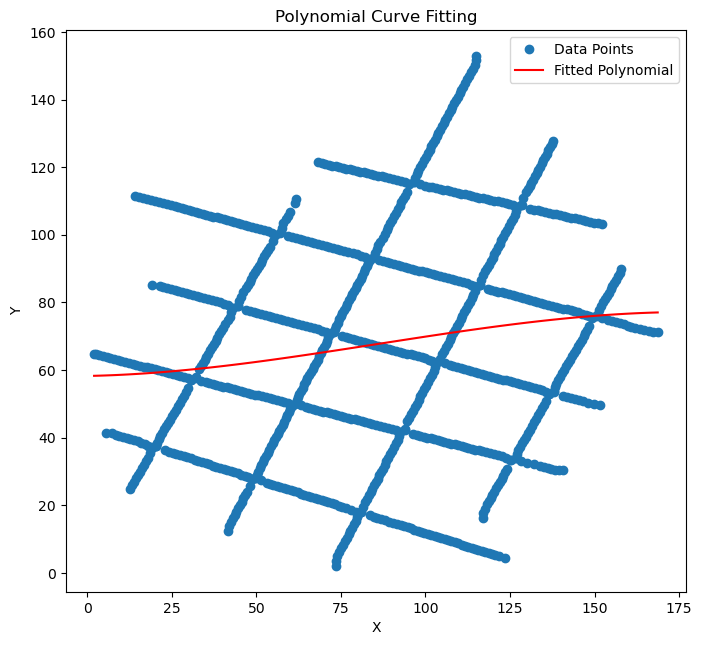

In [5]:
from numpy.polynomial.polynomial import Polynomial

# Fit a polynomial to the points
p = Polynomial.fit(points[:, 0], points[:, 1], 3)

# Predict values using the polynomial
poly_x = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
poly_y = p(poly_x)

# Visualize the result
plt.figure(figsize=(8, 8))
plt.plot(points[:, 0], points[:, 1], 'o', label='Data Points')
plt.plot(poly_x, poly_y, 'r-', label='Fitted Polynomial')
plt.title('Polynomial Curve Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [ ]:
import numpy as np
def read_csv ( csv_path ):
np_path_XYs = np . genfromtxt ( csv_path , delimiter = ’ , ’)
path_XYs = []
for i in np . unique ( np_path_XYs [: , 0]):
npXYs = np_path_XYs [ np_path_XYs [: , 0] == i ][: , 1:]
XYs = []
for j in np . unique ( npXYs [: , 0]):
XY = npXYs [ npXYs [: , 0] == j ][: , 1:]
XYs . append ( XY )
path_XYs . append ( XYs )
return path_XYs

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
def plot ( paths_XYs ):
fig , ax = plt . subplots ( tight_layout = True , figsize =(8 , 8))
for i , XYs in enumerate ( path_XYs ):
c = colours [ i % len( colours )]
for XY in XYs :
ax . plot ( XY [: , 0] , XY [: , 1] , c =c , linewidth =2)
ax . set_aspect ( ’ equal ’)
plt . show ()

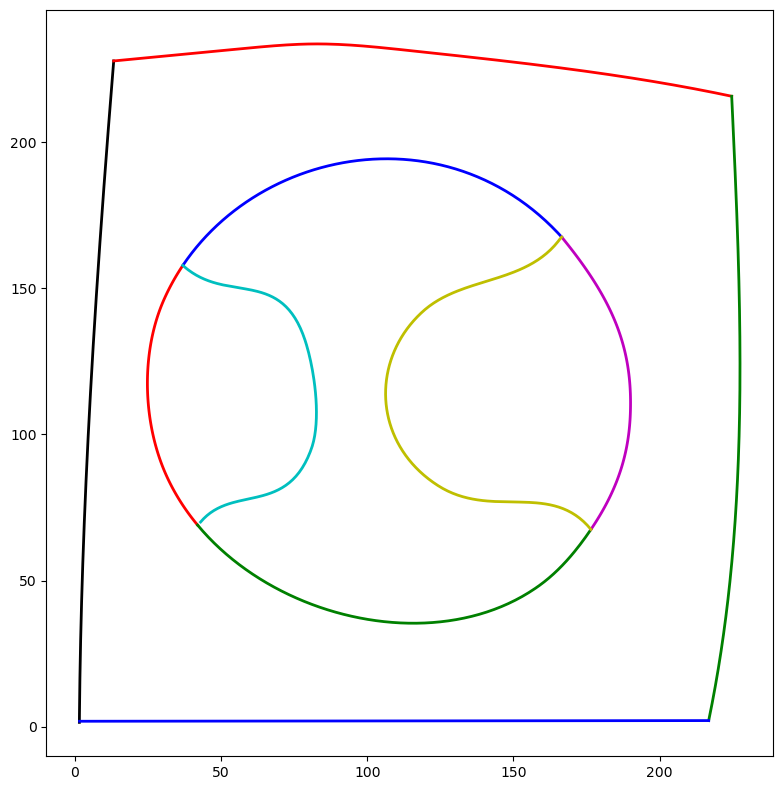

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg

# Function to read CSV files
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot curves
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Function to convert polylines to SVG and save as PNG
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()
    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H,
                     output_width=fact * W, output_height=fact * H, background_color='white')
    return

# Regularize Curves
def identify_regular_shapes(paths_XYs):
    regular_shapes = []
    for path in paths_XYs:
        for XY in path:
            if is_regular_shape(XY):
                regular_shapes.append(XY)
    return regular_shapes

def is_regular_shape(XY):
    # Placeholder for actual shape regularization logic
    return True  # Assume all shapes are regular for now

# Symmetry Identification
def identify_symmetry(paths_XYs):
    symmetrical_shapes = []
    for path in paths_XYs:
        for XY in path:
            if is_symmetric(XY):
                symmetrical_shapes.append(XY)
    return symmetrical_shapes

def is_symmetric(XY):
    # Placeholder for actual symmetry detection logic
    return True  # Assume all shapes are symmetric for now

# Curve Completion
def complete_curves(paths_XYs):
    completed_paths = []
    for path in paths_XYs:
        for XY in path:
            completed_path = fill_gaps(XY)
            completed_paths.append(completed_path)
    return completed_paths

def fill_gaps(XY):
    # Placeholder for actual curve completion logic
    return XY  # Return the same path for now

# Example usage
csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"  # Update this path accordingly
paths_XYs = read_csv(csv_path)
plot(paths_XYs)

#regular_shapes = identify_regular_shapes(paths_XYs)
#plot(regular_shapes)

#symmetrical_shapes = identify_symmetry(paths_XYs)
#plot(symmetrical_shapes)

#completed_paths = complete_curves(paths_XYs)
#plot(completed_paths)

#svg_path = 'output/isolated.svg'  # Update this path accordingly
#polylines2svg(paths_XYs, svg_path)


In [4]:
!pip install numpy matplotlib svgwrite cairosvg


     -------------------------------------- 43.2/43.2 kB 300.0 kB/s eta 0:00:00
     -------------------------------------- 75.6/75.6 kB 416.4 kB/s eta 0:00:00


In [8]:
import cv2
import numpy as np

# Function to read shapes from a CSV file
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def approximate_contours(contours):
    approximations = []
    for contour in contours:
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        approximations.append(approx)
    return approximations

def classify_shape(approx):
    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        return "Circle"
    return "Irregular"

def regularize_shape(approx, shape):
    if shape == "Triangle":
        return approx  # Triangles are already regular
    elif shape == "Square" or shape == "Rectangle":
        x, y, w, h = cv2.boundingRect(approx)
        return np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]], dtype=np.int32).reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(approx)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    return approx

def regularize_shapes_from_csv(csv_path):
    shapes = read_csv(csv_path)
    regularized_shapes = []
    
    for shape in shapes:
        for points in shape:
            # Check the shape of points read from CSV
            print(f"Original Points: {points}")

            # Convert points to a suitable format for contour processing
            contour = points.reshape((-1, 1, 2)).astype(np.int32)
            print(f"Contour Shape: {contour.shape}, Points: {contour}")

            approximations = approximate_contours([contour])
            for approx in approximations:
                shape_type = classify_shape(approx)
                print(f"Classified Shape: {shape_type}")

                if shape_type != "Irregular":
                    regularized_shape = regularize_shape(approx, shape_type)
                    regularized_shapes.append((shape_type, regularized_shape))
    return regularized_shapes

# Example usage
csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
regularized_shapes = regularize_shapes_from_csv(csv_path)

# Create a blank image to draw shapes
image = np.zeros((500, 500, 3), dtype=np.uint8)

# Draw regularized shapes on the image
for shape, contour in regularized_shapes:
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

cv2.imshow('Regularized Shapes from CSV', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Original Points: [[ 41.94200134  68.98000336]
 [ 41.25960541  69.81170654]
 [ 40.58875275  70.65237427]
 [ 39.92960739  71.50195312]
 [ 39.28233719  72.36040497]
 [ 38.6471138   73.22766876]
 [ 38.02410889  74.10371399]
 [ 37.4134903   74.98847961]
 [ 36.81542969  75.88191986]
 [ 36.23009109  76.78398895]
 [ 35.65765381  77.69464874]
 [ 35.09827805  78.6138382 ]
 [ 34.55213928  79.54151917]
 [ 34.01940155  80.47764587]
 [ 33.50024414  81.42215729]
 [ 32.99482727  82.37502289]
 [ 32.50332642  83.33618164]
 [ 32.02590561  84.30560303]
 [ 31.56274223  85.28321838]
 [ 31.11400032  86.26899719]
 [ 30.73366356  87.13911438]
 [ 30.36473846  88.0182724 ]
 [ 30.00725937  88.90615845]
 [ 29.6612606   89.80249023]
 [ 29.3267765   90.70696259]
 [ 29.00383949  91.61927032]
 [ 28.69248199  92.53912354]
 [ 28.39274216  93.46622467]
 [ 28.10464859  94.40027618]
 [ 27.82823944  95.3409729 ]
 [ 27.56354523  96.28801727]
 [ 27.31060028  97.24111938]
 [ 27.06943893  98.19996643]
 [ 26.84009552  99.1642761

In [1]:
import cv2
import numpy as np

# Function to read shapes from a CSV file
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def detect_edges(image):
    edged = cv2.Canny(image, 50, 150)
    return edged

def find_circles(image):
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1.2, 20)
    return circles

def find_lines(image):
    lines = cv2.HoughLinesP(image, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
    return lines

def regularize_circle(circle):
    center = (circle[0], circle[1])
    radius = circle[2]
    return cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10).reshape((-1, 1, 2))

def regularize_line(line):
    return np.array([[line[0], line[1]], [line[2], line[3]]], dtype=np.int32).reshape((-1, 1, 2))

def regularize_shapes(image, edges):
    regularized_shapes = []

    circles = find_circles(edges)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for circle in circles:
            regularized_shape = regularize_circle(circle)
            regularized_shapes.append(("Circle", regularized_shape))

    lines = find_lines(edges)
    if lines is not None:
        for line in lines:
            regularized_shape = regularize_line(line[0])
            regularized_shapes.append(("Line", regularized_shape))

    return regularized_shapes

def draw_shapes(image, shapes):
    for shape, contour in shapes:
        if shape == "Circle":
            cv2.polylines(image, [contour], True, (0, 255, 0), 2)
        elif shape == "Line":
            cv2.polylines(image, [contour], False, (255, 0, 0), 2)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    return image

# Example usage
csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
image = np.zeros((500, 500, 3), dtype=np.uint8)  # Create a blank image for testing

# Simulate reading and plotting points from CSV
shapes = read_csv(csv_path)
for shape in shapes:
    for points in shape:
        contour = points.reshape((-1, 1, 2)).astype(np.int32)
        cv2.polylines(image, [contour], False, (255, 255, 255), 1)

preprocessed = preprocess_image(image)
edges = detect_edges(preprocessed)
regularized_shapes = regularize_shapes(image, edges)
output_image = draw_shapes(image, regularized_shapes)

cv2.imshow('Regularized Shapes from CSV', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_lines(edges):
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
    return lines

def find_circles(edges):
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=15, maxRadius=100)
    return circles

def draw_lines(image, lines):
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

def draw_circles(image, circles):
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for x, y, r in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)

def regularize_shapes(image, edges):
    lines = find_lines(edges)
    circles = find_circles(edges)

    # Create a blank image to draw the regularized shapes
    regularized_image = np.zeros_like(image)
    
    # Draw detected lines
    draw_lines(regularized_image, lines)
    
    # Draw detected circles
    draw_circles(regularized_image, circles)

    return regularized_image

def main():
    image_path = "C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.svg"
    image = cv2.imread(image_path)
    edges = preprocess_image(image)
    regularized_image = regularize_shapes(image, edges)

    cv2.imshow('Original Image', image)
    cv2.imshow('Edges', edges)
    cv2.imshow('Regularized Shapes', regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2573701408.py, line 46)

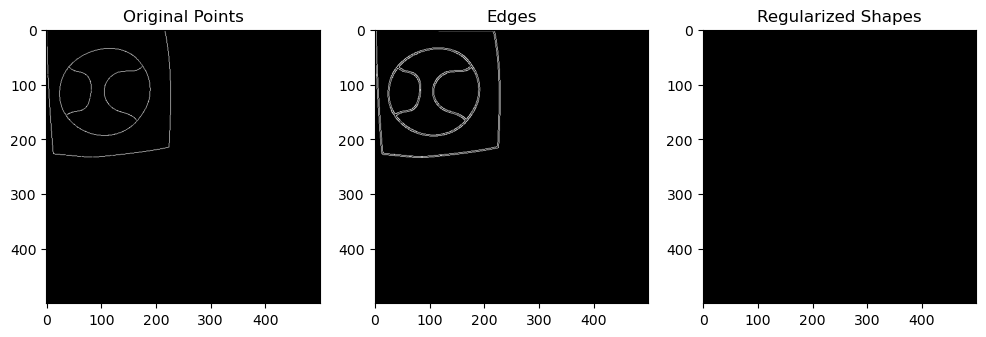

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_lines(edges):
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
    return lines

def find_circles(edges):
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=15, maxRadius=100)
    return circles

def draw_lines(image, lines):
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

def draw_circles(image, circles):
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for x, y, r in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)

def regularize_shapes(image, edges):
    lines = find_lines(edges)
    circles = find_circles(edges)

    # Create a blank image to draw the regularized shapes
    regularized_image = np.zeros_like(image)
    
    # Draw detected lines
    draw_lines(regularized_image, lines)
    
    # Draw detected circles
    draw_circles(regularized_image, circles)

    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    regularized_image = regularize_shapes(image, edges)

    # Display results using matplotlib for better visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Points')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title('Edges')
    plt.imshow(edges, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title('Regularized Shapes')
    plt.imshow(regularized_image, cmap='gray')
    plt.show()

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
    main(csv_path)


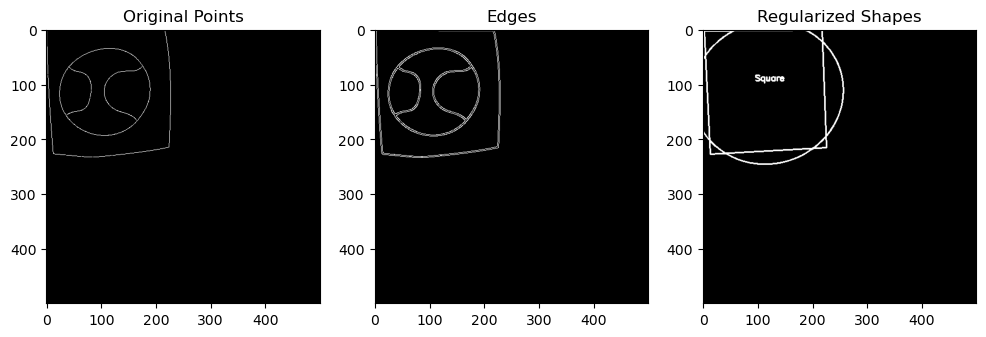

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        # Fit an ellipse
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(regularized_image, ellipse, (255, 255, 255), 2)

        # Fit a polygon (approximating the contour)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            shape = "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
        else:
            shape = "Polygon"
        
        cv2.drawContours(regularized_image, [approx], -1, (255, 255, 255), 2)
        
        # Draw text for shape classification
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(regularized_image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display results using matplotlib for better visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Points')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title('Edges')
    plt.imshow(edges, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title('Regularized Shapes')
    plt.imshow(regularized_image, cmap='gray')
    plt.show()

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
    main(csv_path)


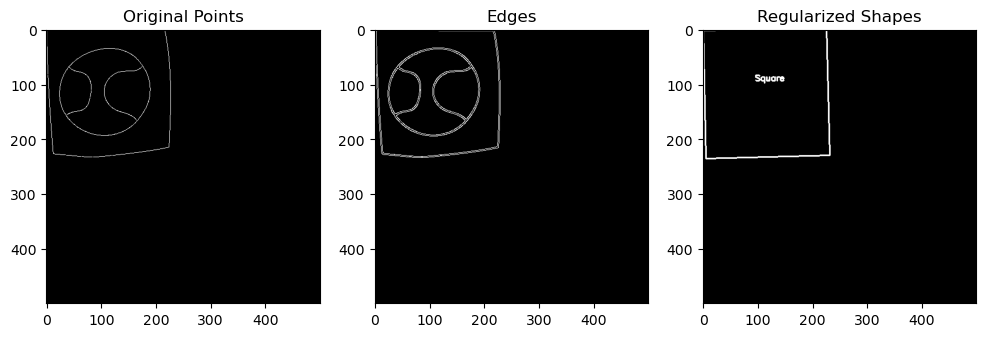

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def regularize_shape(contour, shape):
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    if shape == "Triangle":
        regularized = cv2.convexHull(contour, returnPoints=True)
        if len(regularized) > 3:
            regularized = cv2.approxPolyDP(regularized, 0.1 * cv2.arcLength(regularized, True), True)
        return regularized[:3] if len(regularized) >= 3 else regularized
    elif shape == "Square" or shape == "Rectangle":
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return contour

def classify_shape(approx):
    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        return "Circle"
    return "Irregular"

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        # Fit an ellipse and get bounding box
        ellipse = cv2.fitEllipse(contour)
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        
        # Approximate polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        shape = classify_shape(approx)
        if shape != "Irregular":
            regularized_contour = regularize_shape(contour, shape)
            cv2.drawContours(regularized_image, [regularized_contour], -1, (255, 255, 255), 2)

            # Draw text for shape classification
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(regularized_image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display results using matplotlib for better visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Points')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title('Edges')
    plt.imshow(edges, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title('Regularized Shapes')
    plt.imshow(regularized_image, cmap='gray')
    plt.show()

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
    main(csv_path)


In [47]:
import cv2
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def regularize_shape(contour, shape):
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    if shape == "Triangle":
        regularized = cv2.convexHull(contour, returnPoints=True)
        if len(regularized) > 3:
            regularized = cv2.approxPolyDP(regularized, 0.1 * cv2.arcLength(regularized, True), True)
        return regularized[:3] if len(regularized) >= 3 else regularized
    elif shape == "Square" or shape == "Rectangle":
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return contour

def classify_shape(approx):
    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        return "Circle"
    return "Irregular"

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        # Fit an ellipse and get bounding box
        ellipse = cv2.fitEllipse(contour)
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        
        # Approximate polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        shape = classify_shape(approx)
        if shape != "Irregular":
            regularized_contour = regularize_shape(contour, shape)
            cv2.drawContours(regularized_image, [regularized_contour], -1, (255, 255, 255), 2)

            # Draw text for shape classification
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(regularized_image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display the images using OpenCV
    cv2.imshow('Original Points', image)
    cv2.imshow('Edges', edges)
    cv2.imshow('Regularized Shapes', regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    csv_path = r'C:\Users\KAJAL\Desktop\AdobeHackathon\problems\isolated.csv'
    main(csv_path)


In [11]:
import cv2
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    shape = "Irregular"
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        shape = "Circle"

    return shape

def regularize_shape(contour, shape):
    if shape == "Triangle":
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
        return approx
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return contour

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape != "Irregular":
            regularized_contour = regularize_shape(contour, shape)
            cv2.drawContours(regularized_image, [regularized_contour], -1, (255, 255, 255), 2)

            # Draw text for shape classification
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(regularized_image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display the images using OpenCV
    cv2.imshow('Original Points', image)
    cv2.imshow('Edges', edges)
    cv2.imshow('Regularized Shapes', regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\isolated.csv"
    main(csv_path)


In [13]:
import cv2
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    shape = "Irregular"
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        shape = "Circle"

    return shape

def regularize_shape(contour, shape):
    if shape == "Triangle":
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
        return approx
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return contour

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape != "Irregular":
            regularized_contour = regularize_shape(contour, shape)
            cv2.drawContours(regularized_image, [regularized_contour], -1, (255, 255, 255), 2)

            # Draw text for shape classification
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(regularized_image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display the images using OpenCV
    cv2.imshow('Original Points', image)
    cv2.imshow('Edges', edges)
    cv2.imshow('Regularized Shapes', regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\isolated.csv"
    main(csv_path)


In [48]:
import cv2
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
    
    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        # Use circularity to differentiate between a circle and irregular shapes
        area = cv2.contourArea(contour)
        circularity = 4 * np.pi * (area / (peri ** 2))  # Circularity metric
        if circularity > 0.8:  # Threshold for circularity
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

def regularize_shape(contour, shape):
    if shape == "Triangle":
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
        return approx
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return contour

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape != "Irregular":
            regularized_contour = regularize_shape(contour, shape)
            cv2.drawContours(regularized_image, [regularized_contour], -1, (255, 255, 255), 2)

            # Draw text for shape classification
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(regularized_image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display the images using OpenCV
    cv2.imshow('Original Points', image)
    cv2.imshow('Edges', edges)
    cv2.imshow('Regularized Shapes', regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\isolated.csv"
    main(csv_path)


In [50]:
import cv2
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        # Calculate the area and perimeter for circularity
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)  # Circularity metric
        if circularity > 0.8:  # Adjust this threshold if needed
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

def regularize_shape(contour, shape):
    if shape == "Triangle":
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
        return approx
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:  # For irregular shapes, we can keep the contour but smooth it or approximate
        return cv2.approxPolyDP(contour, 5, True)  # Smoothen the irregular shape

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape:  # Only process recognized shapes
            regularized_contour = regularize_shape(contour, shape)
            cv2.drawContours(regularized_image, [regularized_contour], -1, (255, 255, 255), 2)

            # Draw text for shape classification
            M = cv2.moments(contour)
            if M["m00"] != 0:  # Avoid division by zero
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                cv2.putText(regularized_image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display the images using OpenCV
    cv2.imshow('Original Points', image)
    cv2.imshow('Edges', edges)
    cv2.imshow('Regularized Shapes', regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
    main(csv_path)


# Working

In [27]:
import cv2
import numpy as np
import svgwrite

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape:  # Only process recognized shapes
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

def save_as_svg(regularized_shapes, filename='output3.svg'):
    dwg = svgwrite.Drawing(filename, profile='tiny')

    for shape in regularized_shapes:
        points = [(float(point[0][0]), float(point[0][1])) for point in shape]  # Ensure points are floats
        dwg.add(dwg.polygon(points, fill='none', stroke='black'))

    dwg.save()

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)

    save_as_svg(regularized_shapes)

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\isolated.csv"
    main(csv_path)


In [19]:
!pip install svgwrite

In [54]:
import cv2
import numpy as np
import svgwrite
from scipy.interpolate import splprep, splev

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def smooth_contour(contour):
    # Fit a spline to the contour points for smoothness
    x = contour[:, 0, 0]
    y = contour[:, 0, 1]
    tck, u = splprep([x, y], s=0)
    new_points = splev(np.linspace(0, 1, num=100), tck)
    return np.array(new_points).T.reshape((-1, 1, 2)).astype(np.int32)

def regularize_shape(contour):
    # Use the smooth_contour function to maintain the original shape's smoothness
    smoothed_contour = smooth_contour(contour)
    return smoothed_contour

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit a curve
            continue
        
        regularized_contour = regularize_shape(contour)
        regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

def save_as_svg(regularized_shapes, filename='output.svg', stroke_width=1):
    dwg = svgwrite.Drawing(filename, profile='tiny')

    for shape in regularized_shapes:
        points = [(float(point[0][0]), float(point[0][1])) for point in shape]  # Ensure points are floats
        dwg.add(dwg.polygon(points, fill='none', stroke='black', stroke_width=stroke_width))

    dwg.save()

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)

    save_as_svg(regularized_shapes)

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
    main(csv_path)


In [80]:
import cv2
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def regularize_shape(contour):
    # Calculate parameters
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    radius = int(np.sqrt(area / np.pi))  # Approximate radius for a circle

    # Check the number of points in the contour
    if len(contour) < 5:  # Too few points to regularize
        return contour  # Return original contour

    # Regularize based on parameters
    if w > h:  # Wider than tall -> Rectangle
        return np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]], dtype=np.int32).reshape((-1, 1, 2))
    else:  # Taller than wide -> Use height for circle
        center = (x + w // 2, y + h // 2)
        circle = np.zeros((500, 500), dtype=np.uint8)  # Create a blank image
        cv2.circle(circle, center, radius, 255, -1)  # Draw the filled circle
        return cv2.findContours(circle, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]  # Get contour of the circle

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        regularized_contour = regularize_shape(contour)
        regularized_shapes.append(regularized_contour)
    return regularized_shapes

def display_shapes(image, regularized_shapes):
    output_image = image.copy()
    
    for shape in regularized_shapes:
        cv2.drawContours(output_image, [shape], -1, (255), thickness=cv2.FILLED)

    # Display the image with regularized shapes
    cv2.imshow("Regularized Shapes", output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)

    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)

    display_shapes(image, regularized_shapes)

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
    main(csv_path)


In [32]:
import cv2
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def regularize_shape(contour):
    # Use Hough Transform to detect lines
    lines = cv2.HoughLinesP(contour, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(contour, (x1, y1), (x2, y2), (255), 2)  # Draw the line on the contour
    else:
        # If no lines are detected, treat it as a circle
        # Calculate parameters for a circle
        area = cv2.contourArea(contour)
        radius = int(np.sqrt(area / np.pi))  # Approximate radius for a circle
        x, y, w, h = cv2.boundingRect(contour)
        center = (x + w // 2, y + h // 2)
        return cv2.circle(np.zeros_like(contour), center, radius, (255), -1)

    return contour

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        regularized_contour = regularize_shape(contour)
        regularized_shapes.append(regularized_contour)
    return regularized_shapes

def display_shapes(image, regularized_shapes):
    output_image = image.copy()
    
    for shape in regularized_shapes:
        cv2.drawContours(output_image, [shape], -1, (255), thickness=cv2.FILLED)

    # Display the image with regularized shapes
    cv2.imshow("Regularized Shapes", output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)

    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)

    display_shapes(image, regularized_shapes)

if __name__ == "__main__":
    csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
    main(csv_path)


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:473: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'cv::HoughLinesProbabilistic'


In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

def read_csv(csv_path):
    path_XYs = []
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def draw_paths(paths):
    # Create a blank image to draw on
    height, width = 512, 512  # Define the size of the image
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background
    
    for paths_group in paths:
        for path in paths_group:
            path = np.array(path, dtype=np.int32)
            # Draw the path on the image
            cv2.polylines(image, [path], isClosed=False, color=(0, 0, 0), thickness=2)
    
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def detect_lines(image):
    lines = cv2.HoughLinesP(image, 1, np.pi / 180, threshold=100, minLineLength=30, maxLineGap=10)
    return lines

def detect_circles(image):
    circles = cv2.HoughCircles(image, cv2.HOUGHT_GRADIENT, dp=1, minDist=20, 
                               param1=50, param2=30, minRadius=0, maxRadius=0)
    return circles

def detect_rectangles(contours):
    rectangles = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            rectangles.append(approx)
    return rectangles

def detect_polygons(contours, num_sides=5):
    polygons = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == num_sides:
            polygons.append(approx)
    return polygons

def detect_stars(contours):
    stars = []
    for contour in contours:
        # Placeholder for star detection logic
        # You may implement specific geometric checks here
        pass
    return stars

def regularize_shape(image, contours):
    regular_shapes = {
        "lines": [],
        "circles": [],
        "rectangles": [],
        "polygons": [],
        "stars": []
    }
    
    # Detect lines using Hough Transform on the edge image
    lines = detect_lines(image)
    if lines is not None:
        regular_shapes["lines"].extend(lines[:, 0])
    
    # Detect circles using Hough Transform
    circles = detect_circles(image)
    if circles is not None:
        regular_shapes["circles"].extend(circles[0])
    
    # Other shapes
    regular_shapes["rectangles"].extend(detect_rectangles(contours))
    regular_shapes["polygons"].extend(detect_polygons(contours, num_sides=6))  # Example for hexagons
    regular_shapes["stars"].extend(detect_stars(contours))
    
    return regular_shapes

def display_shapes(image, regular_shapes):
    for line in regular_shapes["lines"]:
        cv2.line(image, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 2)
        
    for circle in regular_shapes["circles"]:
        center = (int(circle[0]), int(circle[1]))
        radius = int(circle[2])
        cv2.circle(image, center, radius, (255, 0, 0), 2)

    for rect in regular_shapes["rectangles"]:
        cv2.polylines(image, [rect], isClosed=True, color=(0, 0, 255), thickness=2)

    for polygon in regular_shapes["polygons"]:
        cv2.polylines(image, [polygon], isClosed=True, color=(0, 255, 255), thickness=2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def main(csv_path):
    paths = read_csv(csv_path)
    image = draw_paths(paths)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regular_shapes = regularize_shape(edges, contours)
    display_shapes(image, regular_shapes)

if __name__ == "__main__":
    main(r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv")


AttributeError: module 'cv2' has no attribute 'HOUGHT_GRADIENT'

In [38]:
!pip install --upgrade opencv-python --user

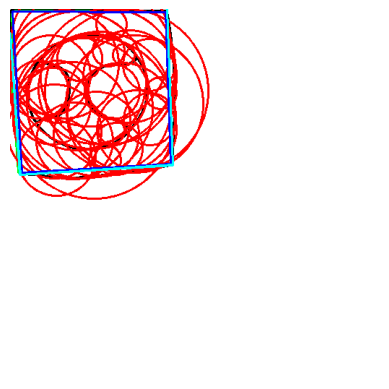

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def read_csv(csv_path):
    path_XYs = []
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def draw_paths(paths):
    height, width = 512, 512  # Define the size of the image
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background
    
    for paths_group in paths:
        for path in paths_group:
            path = np.array(path, dtype=np.int32)
            cv2.polylines(image, [path], isClosed=False, color=(0, 0, 0), thickness=2)
    
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def detect_lines(image):
    lines = cv2.HoughLinesP(image, 1, np.pi / 180, threshold=100, minLineLength=30, maxLineGap=10)
    return lines

def detect_circles(image):
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, 
                               param1=50, param2=30, minRadius=0, maxRadius=0)
    return circles

def detect_rectangles(contours):
    rectangles = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            rectangles.append(approx)
    return rectangles

def detect_polygons(contours, num_sides=5):
    polygons = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == num_sides:
            polygons.append(approx)
    return polygons

def regularize_shape(image, contours):
    regular_shapes = {
        "lines": None,
        "circles": None,
        "rectangles": None,
        "polygons": None,
    }
    
    # Detect lines using Hough Transform
    lines = detect_lines(image)
    if lines is not None:
        regular_shapes["lines"] = lines[:, 0]  # Keep only one line

    # Detect circles using Hough Transform
    circles = detect_circles(image)
    if circles is not None:
        regular_shapes["circles"] = circles[0]  # Keep only one circle
    
    # Detect rectangles
    rectangles = detect_rectangles(contours)
    if rectangles:
        # Select the largest rectangle
        largest_rectangle = max(rectangles, key=lambda r: cv2.contourArea(r))
        regular_shapes["rectangles"] = largest_rectangle  # Keep only the largest rectangle

    # Detect polygons
    polygons = detect_polygons(contours, num_sides=6)  # Example for hexagons
    if polygons:
        # Select the largest polygon
        largest_polygon = max(polygons, key=lambda p: cv2.contourArea(p))
        regular_shapes["polygons"] = largest_polygon  # Keep only the largest polygon

    return regular_shapes

def display_shapes(image, regular_shapes):
    # Draw detected lines
    if regular_shapes["lines"] is not None:
        for line in regular_shapes["lines"]:
            cv2.line(image, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 2)
        
    # Draw detected circles
    if regular_shapes["circles"] is not None:
        for circle in regular_shapes["circles"]:
            center = (int(circle[0]), int(circle[1]))
            radius = int(circle[2])
            cv2.circle(image, center, radius, (255, 0, 0), 2)

    # Draw detected rectangles
    if regular_shapes["rectangles"] is not None:
        cv2.polylines(image, [regular_shapes["rectangles"]], isClosed=True, color=(0, 0, 255), thickness=2)

    # Draw detected polygons
    if regular_shapes["polygons"] is not None:
        cv2.polylines(image, [regular_shapes["polygons"]], isClosed=True, color=(0, 255, 255), thickness=2)

    # Show the final image with detected shapes
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def main(csv_path):
    paths = read_csv(csv_path)
    image = draw_paths(paths)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regular_shapes = regularize_shape(edges, contours)
    display_shapes(image, regular_shapes)

if __name__ == "__main__":
    main(r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv")


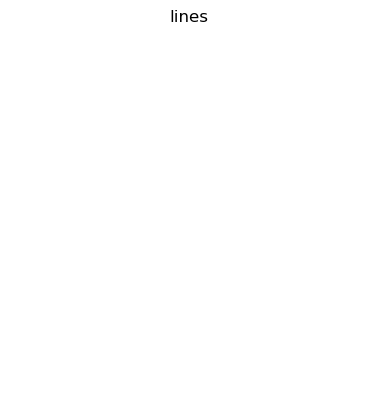

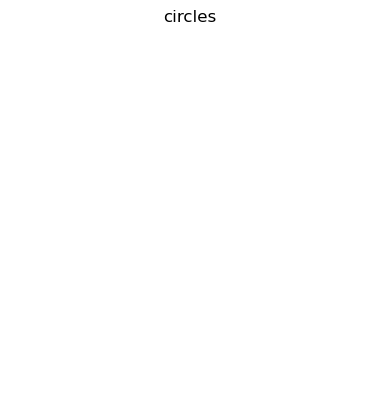

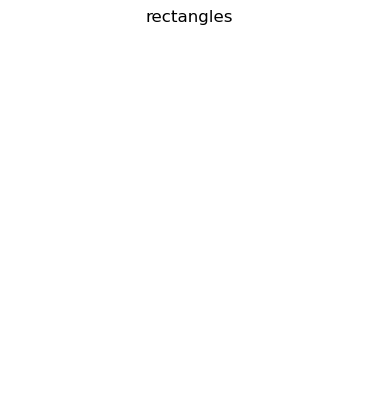

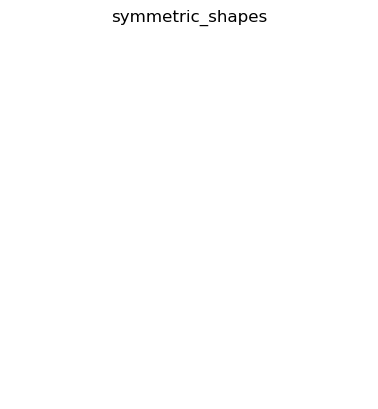

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cairosvg

def convert_svg_to_png(svg_path, png_path):
    cairosvg.svg2png(url=svg_path, write_to=png_path)

def read_image(png_path):
    image = cv2.imread(png_path)
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def detect_lines(image):
    lines = cv2.HoughLinesP(image, 1, np.pi / 180, threshold=100, minLineLength=30, maxLineGap=10)
    return lines

def detect_circles(image):
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, 
                               param1=50, param2=30, minRadius=0, maxRadius=0)
    return circles

def detect_rectangles(contours):
    rectangles = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            rectangles.append(approx)
    return rectangles

def detect_symmetric_shapes(contours):
    symmetric_shapes = []
    for contour in contours:
        if cv2.isContourConvex(contour):
            moments = cv2.moments(contour)
            if moments['m00'] != 0:
                cx = int(moments['m10'] / moments['m00'])
                cy = int(moments['m01'] / moments['m00'])
                dists = [np.linalg.norm(np.array([cx, cy]) - point[0]) for point in contour]
                if np.std(dists) < 10:  # Symmetry criterion
                    symmetric_shapes.append(contour)
    return symmetric_shapes

def extract_and_save_shapes(image, contours, edges):
    shape_images = {
        "lines": np.ones_like(image) * 255,
        "circles": np.ones_like(image) * 255,
        "rectangles": np.ones_like(image) * 255,
        "symmetric_shapes": np.ones_like(image) * 255,
    }

    # Draw each detected shape on its respective canvas
    lines = detect_lines(edges)  # Use edges instead of image
    if lines is not None:
        for line in lines:
            cv2.line(shape_images["lines"], (line[0][0], line[0][1]), (line[0][2], line[0][3]), (0, 255, 0), 2)

    circles = detect_circles(edges)  # Use edges for circle detection
    if circles is not None:
        for circle in circles[0]:
            center = (int(circle[0]), int(circle[1]))
            radius = int(circle[2])
            cv2.circle(shape_images["circles"], center, radius, (255, 0, 0), 2)

    rectangles = detect_rectangles(contours)
    if rectangles:
        largest_rectangle = max(rectangles, key=lambda r: cv2.contourArea(r))
        cv2.polylines(shape_images["rectangles"], [largest_rectangle], isClosed=True, color=(0, 0, 255), thickness=2)

    symmetric_shapes = detect_symmetric_shapes(contours)
    for shape in symmetric_shapes:
        cv2.drawContours(shape_images["symmetric_shapes"], [shape], -1, (0, 255, 255), 2)

    return shape_images

def main(svg_path):
    png_path = svg_path.replace('.svg', '.png')
    convert_svg_to_png(svg_path, png_path)
    image = read_image(png_path)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    shape_images = extract_and_save_shapes(image, contours, edges)  # Pass edges here
    display_shapes(shape_images)

if __name__ == "__main__":
    main(r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.svg")


In [79]:
import cv2
import numpy as np
import svgwrite
from svg.path import parse_path
import re

def read_svg(svg_path):
    with open(svg_path, 'r') as f:
        content = f.read()
    return content

def extract_points_from_svg(svg_content):
    path_pattern = re.compile(r'<path[^>]*d="([^"]+)"')
    path_strings = path_pattern.findall(svg_content)
    
    points = []
    for path_string in path_strings:
        try:
            path = parse_path(path_string)
            path_points = []
            for segment in path:
                if hasattr(segment, 'start'):
                    path_points.append((segment.start.real, segment.start.imag))
                if hasattr(segment, 'end'):
                    path_points.append((segment.end.real, segment.end.imag))
            points.append(np.array(path_points))
        except Exception as e:
            print(f"Error parsing path: {path_string}")
            print(f"Exception: {e}")
    
    return points

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for contour in points:
        for point in contour:
            x, y = int(point[0]), int(point[1])
            image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape:  # Only process recognized shapes
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

def save_as_svg(regularized_shapes, filename='output.svg'):
    dwg = svgwrite.Drawing(filename, profile='tiny')

    for shape in regularized_shapes:
        points = [(float(point[0][0]), float(point[0][1])) for point in shape]  # Ensure points are floats
        dwg.add(dwg.polygon(points, fill='none', stroke='black'))

    dwg.save()

def main(svg_path):
    svg_content = read_svg(svg_path)
    path_XYs = extract_points_from_svg(svg_content)
    image = plot_points_on_image(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)

    save_as_svg(regularized_shapes)

if __name__ == "__main__":
    svg_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.svg"
    main(svg_path)


In [58]:
!pip install svgwrite svg.path

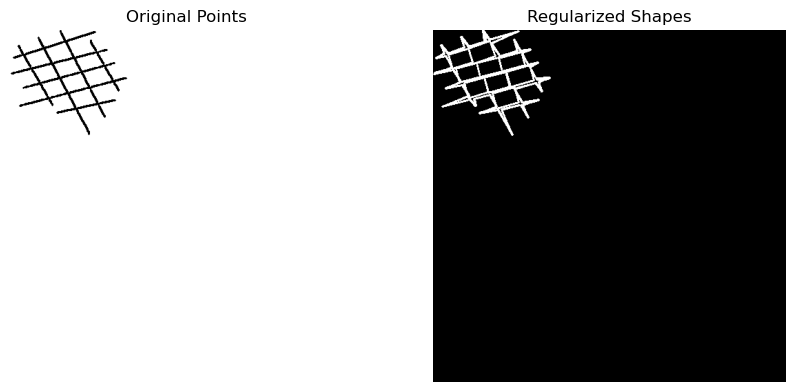

In [95]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def read_csv(csv_path):
    path_XYs = []
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def draw_paths(paths):
    height, width = 512, 512  # Define the size of the image
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background
    
    for paths_group in paths:
        for path in paths_group:
            path = np.array(path, dtype=np.int32)
            cv2.polylines(image, [path], isClosed=False, color=(0, 0, 0), thickness=2)
    
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        # Calculate the area and perimeter for circularity
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)  # Circularity metric
        if circularity > 0.8:  # Adjust this threshold if needed
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

def regularize_shape(contour, shape):
    if shape == "Triangle":
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
        return approx
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:  # For irregular shapes, we can keep the contour but smooth it or approximate
        return cv2.approxPolyDP(contour, 5, True)  # Smoothen the irregular shape

def fit_shapes(image, contours):
    regularized_image = np.zeros_like(image)
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape:  # Only process recognized shapes
            regularized_contour = regularize_shape(contour, shape)
            cv2.drawContours(regularized_image, [regularized_contour], -1, (255, 255, 255), 2)
    
    return regularized_image

def main(csv_path):
    path_XYs = read_csv(csv_path)
    image = draw_paths(path_XYs)
    
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_image = fit_shapes(image, contours)

    # Display the images using OpenCV
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Points')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Regularized Shapes')
    plt.imshow(cv2.cvtColor(regularized_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main(r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag2.csv")


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial
import csv

# Read the CSV file without headers
csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag2.csv"
points_df = pd.read_csv(csv_path, header=None)

# Extract x and y coordinates based on the structure of your data
x = points_df.iloc[:, -2].values
y = points_df.iloc[:, -1].values

# Combine x and y into a single array of points
points = np.vstack((x, y)).T

# Function to save points to CSV
def save_points_to_csv(filename, points):
    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['X', 'Y'])
        writer.writerows(points)

# Function to save plot as an image
def save_plot_as_image(filename):
    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300)
    plt.close()

# Function to complete a polygon (assuming it's a closed shape)
def complete_polygon(points):
    if not np.array_equal(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    return points

# Shape regularization using a line fitting (RANSAC)
ransac = RANSACRegressor()
ransac.fit(points[:, 0].reshape(-1, 1), points[:, 1])

# Predict line values
line_x = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
line_y = ransac.predict(line_x.reshape(-1, 1))

# Polynomial curve fitting
p = Polynomial.fit(points[:, 0], points[:, 1], 3)
poly_x = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
poly_y = p(poly_x)

# Example completion: Assume completing a polygon
completed_polygon_points = complete_polygon(points)

# Save the completed points to a CSV file
completed_csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\outputs\completed_shape.csv"
save_points_to_csv(completed_csv_path, completed_polygon_points)

# Visualization of the regularized and completed shapes
plt.figure(figsize=(8, 8))
plt.plot(points[:, 0], points[:, 1], 'o', label='Original Points')
plt.plot(line_x, line_y, 'r-', label='Fitted Line')
plt.plot(poly_x, poly_y, 'b-', label='Fitted Polynomial')
plt.plot(completed_polygon_points[:, 0], completed_polygon_points[:, 1], 'g--', label='Completed Shape')
plt.title('Shape Regularization and Completion')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Save the plot as an image
plot_image_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\outputs\completed_shape.png"
save_plot_as_image(plot_image_path)

print(f"Completed shape saved as CSV at: {completed_csv_path}")
print(f"Plot saved as image at: {plot_image_path}")


Completed shape saved as CSV at: C:\Users\KAJAL\Desktop\AdobeHackathon\outputs\completed_shape.csv
Plot saved as image at: C:\Users\KAJAL\Desktop\AdobeHackathon\outputs\completed_shape.png


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
import csv

# Read the CSV file without headers
csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0.csv"
points_df = pd.read_csv(csv_path, header=None)

# Extract x and y coordinates based on the structure of your data
x = points_df.iloc[:, -2].values
y = points_df.iloc[:, -1].values

# Combine x and y into a single array of points
points = np.vstack((x, y)).T

# Function to save points to CSV
def save_points_to_csv(filename, points):
    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['X', 'Y'])
        writer.writerows(points)

# Function to save plot as an image
def save_plot_as_image(filename):
    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300)
    plt.close()

# Function to identify straight segments and connect them
def connect_straight_segments(points, min_samples=2, residual_threshold=2):
    straight_segments = []
    
    # Run RANSAC on the entire set of points
    ransac = RANSACRegressor(min_samples=min_samples, residual_threshold=residual_threshold)
    ransac.fit(points[:, 0].reshape(-1, 1), points[:, 1])
    
    inlier_mask = ransac.inlier_mask_
    straight_line_points = points[inlier_mask]

    if len(straight_line_points) > 1:
        straight_segments.append(straight_line_points)
    
    return straight_segments

# Identify and connect straight segments
straight_segments = connect_straight_segments(points)

# Flatten the list of straight segments into a single array of points
connected_points = np.vstack(straight_segments)

# Sort the points to maintain proper order for plotting
connected_points = connected_points[np.argsort(connected_points[:, 0])]

# Save the connected points to a CSV file
completed_csv_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\outputs\regularized_shape.csv"
save_points_to_csv(completed_csv_path, connected_points)

# Visualization of the regularized shape by connecting straight segments
plt.figure(figsize=(8, 8))
plt.plot(points[:, 0], points[:, 1], 'o', label='Original Points')
plt.plot(connected_points[:, 0], connected_points[:, 1], 'r-', label='Regularized Shape')
plt.title('Shape Regularization by Connecting Straight Segments')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Save the plot as an image
plot_image_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\outputs\regularized_shape.png"
save_plot_as_image(plot_image_path)

print(f"Regularized shape saved as CSV at: {completed_csv_path}")
print(f"Plot saved as image at: {plot_image_path}")


C:\Users\KAJAL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [11]:
import numpy as np
import svgwrite
import cairosvg
import matplotlib.pyplot as plt

colours = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# 1. Regularizing Curves
def detect_straight_lines(points, threshold=0.1):
    lines = []
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        if np.linalg.norm(p2 - p1) < threshold:
            continue
        lines.append((p1, p2))
    return lines

def fit_circle(points):
    x = points[:, 0]
    y = points[:, 1]
    A = np.c_[x, y, np.ones(x.shape)]
    B = x**2 + y**2
    params = np.linalg.lstsq(A, B, rcond=None)[0]
    center = (params[0] / 2, params[1] / 2)
    radius = np.sqrt(center[0]**2 + center[1]**2 + params[2])
    return center, radius

def fit_ellipse(points):
    # Fit ellipse using algebraic distance method
    x = points[:, 0]
    y = points[:, 1]
    D = np.c_[x**2, x * y, y**2, x, y, np.ones(len(x))]
    S = np.dot(D.T, D)
    C = np.zeros((6, 6))
    # Filling C with the coefficients
    for i in range(6):
        for j in range(6):
            C[i, j] = S[i, j] if i == j else S[i, j] / (i + j + 1)
    eigvals, eigvecs = np.linalg.eig(C)
    # The smallest eigenvalue corresponds to the best fit
    params = eigvecs[:, np.argmin(eigvals)]
    return params

def detect_rectangle(points):
    # Check for right angles using dot product
    rect_points = []
    for i in range(len(points)):
        p1 = points[i]
        p2 = points[(i + 1) % len(points)]
        p3 = points[(i + 2) % len(points)]
        angle = np.arccos(np.clip(np.dot(p2 - p1, p3 - p2) / (np.linalg.norm(p2 - p1) * np.linalg.norm(p3 - p2)), -1, 1))
        if np.isclose(angle, np.pi / 2, atol=0.1):
            rect_points.append((p1, p2, p3))
    return rect_points

def detect_regular_polygon(points):
    num_sides = len(points)
    if num_sides < 3:
        return False
    side_lengths = [np.linalg.norm(points[i] - points[(i + 1) % num_sides]) for i in range(num_sides)]
    angles = [np.arccos(np.clip(np.dot(points[i] - points[(i - 1) % num_sides], points[(i + 1) % num_sides] - points[i]) /
                                (np.linalg.norm(points[i] - points[(i - 1) % num_sides]) * np.linalg.norm(points[(i + 1) % num_sides] - points[i])), -1, 1)) for i in range(num_sides)]
    return np.allclose(side_lengths, side_lengths[0]) and np.allclose(angles, angles[0])

def detect_star_shape(points):
    # Check for a central point and radial arms
    centroid = np.mean(points, axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    # Group points based on distance from centroid
    return np.unique(distances)

# 2. Exploring Symmetry in Curves
def check_reflectional_symmetry(points):
    centroid = np.mean(points, axis=0)
    mirrored_points = 2 * centroid - points
    return np.all(np.isclose(np.sort(points, axis=0), np.sort(mirrored_points, axis=0)))

# 3. Completing Incomplete Curves
def complete_curves(points):
    # Identify gaps and connect based on neighboring points
    completed = points.copy()
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        if np.linalg.norm(p2 - p1) > 0.1:  # Assuming a gap
            completed = np.vstack((completed, (p1 + p2) / 2))  # Add midpoint
    return completed

# 4. CSV I/O for Shapes
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def write_csv(output_path, shapes):
    with open(output_path, 'w') as f:
        for i, shape in enumerate(shapes):
            for path in shape:
                for point in path:
                    f.write(f"{i},{point[0]},{point[1]}\n")

# 5. Visualization using SVG
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()
    png_path = svg_path.replace('.svg', '.png')
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, background_color='white')

# 6. Evaluation
def evaluate_shapes(detected_shapes):
    regular_shapes_count = 0
    for shape in detected_shapes:
        if detect_regular_polygon(shape):
            regular_shapes_count += 1
    return regular_shapes_count

# Example Usage
if __name__ == "__main__":
    # Replace with your CSV file path
    input_csv = 'examples/isolated.csv'
    output_csv = 'examples/isolated_sol.csv'
    
    paths_XYs = read_csv(input_csv)
    
    detected_shapes = []
    
    for path in paths_XYs:
        for points in path:
            lines = detect_straight_lines(points)
            if lines:
                detected_shapes.append(lines)
                
            circle_params = fit_circle(points)
            if circle_params:
                detected_shapes.append(circle_params)
                
            ellipse_params = fit_ellipse(points)
            if ellipse_params:
                detected_shapes.append(ellipse_params)
                
            rectangles = detect_rectangle(points)
            if rectangles:
                detected_shapes.append(rectangles)
                
            if detect_regular_polygon(points):
                detected_shapes.append(points)
                
            if detect_star_shape(points):
                detected_shapes.append(points)
    
    # Evaluate detected shapes
    regular_shapes_count = evaluate_shapes(detected_shapes)
    print(f"Detected regular shapes: {regular_shapes_count}")
    
    # Write output to CSV
    write_csv(output_csv, detected_shapes)
    
    # Visualize detected shapes
    polylines2svg(paths_XYs, 'output.svg')
    plt.figure(figsize=(8, 8))
    for path in paths_XYs:
        for XY in path:
            plt.plot(XY[:, 0], XY[:, 1])
    plt.axis('equal')
    plt.show()


FileNotFoundError: examples/isolated.csv not found.

In [20]:
import numpy as np
import svgwrite
import cairosvg
import matplotlib.pyplot as plt

colours = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# 1. Regularizing Curves
def detect_straight_lines(points, threshold=0.1):
    lines = []
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        if np.linalg.norm(p2 - p1) < threshold:
            continue
        lines.append((p1, p2))
    return lines

def fit_circle(points):
    x = points[:, 0]
    y = points[:, 1]
    A = np.c_[x, y, np.ones(x.shape)]
    B = x**2 + y**2
    params = np.linalg.lstsq(A, B, rcond=None)[0]
    center = (params[0] / 2, params[1] / 2)
    radius = np.sqrt(center[0]**2 + center[1]**2 + params[2])
    return {'type': 'circle', 'center': center, 'radius': radius}  # Return as a dictionary

def fit_ellipse(points):
    x = points[:, 0]
    y = points[:, 1]
    D = np.c_[x**2, x * y, y**2, x, y, np.ones(len(x))]
    S = np.dot(D.T, D)
    C = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            C[i, j] = S[i, j] if i == j else S[i, j] / (i + j + 1)
    eigvals, eigvecs = np.linalg.eig(C)
    params = eigvecs[:, np.argmin(eigvals)]
    return {'type': 'ellipse', 'params': params}  # Return as a dictionary

def detect_rectangle(points):
    rect_points = []
    for i in range(len(points)):
        p1 = points[i]
        p2 = points[(i + 1) % len(points)]
        p3 = points[(i + 2) % len(points)]
        angle = np.arccos(np.clip(np.dot(p2 - p1, p3 - p2) / (np.linalg.norm(p2 - p1) * np.linalg.norm(p3 - p2)), -1, 1))
        if np.isclose(angle, np.pi / 2, atol=0.1):
            rect_points.append((p1, p2, p3))
    return np.array(rect_points)  # Return as an array

def detect_regular_polygon(points):
    num_sides = len(points)
    if num_sides < 3:
        return False
    side_lengths = [np.linalg.norm(points[i] - points[(i + 1) % num_sides]) for i in range(num_sides)]
    angles = [np.arccos(np.clip(np.dot(points[i] - points[(i - 1) % num_sides], points[(i + 1) % num_sides] - points[i]) /
                                (np.linalg.norm(points[i] - points[(i - 1) % num_sides]) * np.linalg.norm(points[(i + 1) % num_sides] - points[i])), -1, 1)) for i in range(num_sides)]
    return np.allclose(side_lengths, side_lengths[0]) and np.allclose(angles, angles[0])

def detect_star_shape(points):
    centroid = np.mean(points, axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    return np.allclose(distances, distances[0], rtol=0.1)  # Allow some tolerance

# 2. Exploring Symmetry in Curves
def check_reflectional_symmetry(points):
    centroid = np.mean(points, axis=0)
    mirrored_points = 2 * centroid - points
    return np.all(np.isclose(np.sort(points, axis=0), np.sort(mirrored_points, axis=0)))

# 3. Completing Incomplete Curves
def complete_curves(points):
    completed = points.copy()
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        if np.linalg.norm(p2 - p1) > 0.1:
            completed = np.vstack((completed, (p1 + p2) / 2))
    return completed

# 4. CSV I/O for Shapes
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def write_csv(output_path, shapes):
    with open(output_path, 'w') as f:
        for i, shape in enumerate(shapes):
            if isinstance(shape, dict):
                if shape['type'] == 'circle':
                    f.write(f"{i},circle,{shape['center'][0]},{shape['center'][1]},{shape['radius']}\n")
                elif shape['type'] == 'ellipse':
                    f.write(f"{i},ellipse,{','.join(map(str, shape['params']))}\n")
            else:  # Assuming it's a numpy array of points
                for point in shape:
                    f.write(f"{i},{point[0]},{point[1]}\n")

# 5. Visualization using SVG
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()
    png_path = svg_path.replace('.svg', '.png')
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, background_color='white')

# 6. Evaluation
def evaluate_shapes(detected_shapes):
    regular_shapes_count = 0
    for shape in detected_shapes:
        if isinstance(shape, np.ndarray) and detect_regular_polygon(shape):
            regular_shapes_count += 1
    return regular_shapes_count

# Example Usage
if __name__ == "__main__":
    # Set your CSV file path here
    input_csv = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag2.csv"
    output_csv = r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\frag0_sol.csv"
    
    paths_XYs = read_csv(input_csv)
    
    detected_shapes = []
    
    for path in paths_XYs:
        for points in path:
            lines = detect_straight_lines(points)
            if lines:
                detected_shapes.append(np.array(lines))  # Ensure it's an array
                
            circle_params = fit_circle(points)
            detected_shapes.append(circle_params)  # Append as dict
                
            ellipse_params = fit_ellipse(points)
            detected_shapes.append(ellipse_params)  # Append as dict
                
            rectangles = detect_rectangle(points)
            if rectangles.size > 0:  # Check if any rectangles detected
                detected_shapes.append(rectangles)
                
            if detect_regular_polygon(points):
                detected_shapes.append(points)
                
            if detect_star_shape(points):
                detected_shapes.append(points)

    # Evaluate detected shapes
    regular_shapes_count = evaluate_shapes(detected_shapes)
    print(f"Detected regular shapes: {regular_shapes_count}")

    # Write output to CSV
    write_csv(output_csv, detected_shapes)

    # Create SVG visualization
    svg_path = r"C:\Users\KAJAL\Desktop\AdobeHackathon\shapes.svg"
    polylines2svg(paths_XYs, svg_path)


Detected regular shapes: 0


In [24]:
import tkinter as tk
from tkinter import filedialog, messagebox
import cv2
import numpy as np
import svgwrite
import matplotlib.pyplot as plt

colours = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Function to read shapes from a CSV file
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot points on an image
def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

# Function to preprocess an image (blur and edge detection)
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

# Function to find contours in the image
def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Function to classify shapes based on contour
def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

# Function to regularize the shape (fit to standard geometric shapes)
def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

# Function to fit shapes based on contours
def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape:  # Only process recognized shapes
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

# Function to save polylines as an SVG file
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        for contour in path:
            path_data.append(('M', *contour[0]))
            for point in contour[1:]:
                path_data.append(('L', *point))
        path_data.append(('Z',))
        group.add(dwg.path(d=path_data, stroke=colours[i % len(colours)], fill='none', stroke_width=3))
    dwg.add(group)
    dwg.save()

# Function to plot contours with classification using matplotlib
def plot_contours_with_classification(image, contours):
    plt.figure()
    plt.imshow(image, cmap='gray')
    for i, contour in enumerate(contours):
        shape = classify_shape(contour)
        regularized_shape = regularize_shape(contour, shape)
        color = (np.random.random(), np.random.random(), np.random.random())
        plt.plot(regularized_shape[:, 0, 0], regularized_shape[:, 0, 1], 'o', color=color, label=f'Shape {i}: {shape}')
    plt.legend()
    plt.show()

# Main processing function that integrates the workflow
def process_image_and_shapes(csv_path):
    shapes = read_csv(csv_path)
    image = plot_points_on_image(shapes)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    fitted_shapes = fit_shapes(image, contours)
    plot_contours_with_classification(image, fitted_shapes)
    polylines2svg(fitted_shapes, "output.svg")
    messagebox.showinfo("Processing Complete", "The image has been processed and saved as output.svg")

# Function to handle file selection and processing
def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        process_image_and_shapes(file_path)

# Setting up the tkinter GUI
def setup_gui():
    root = tk.Tk()
    root.title("Shape Detection and Classification")

    frame = tk.Frame(root)
    frame.pack(pady=20, padx=20)

    btn_select = tk.Button(frame, text="Select CSV File", command=select_file)
    btn_select.pack(pady=10)

    root.mainloop()

# Running the GUI
setup_gui()


# final

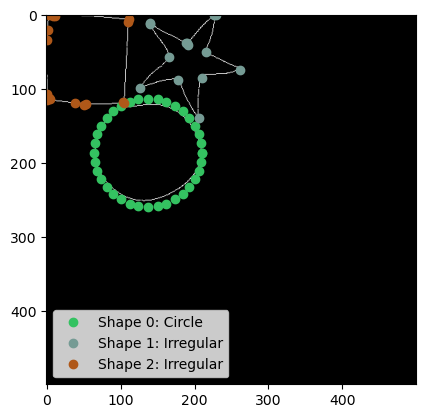

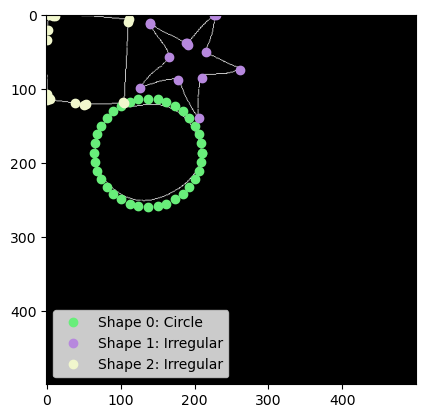

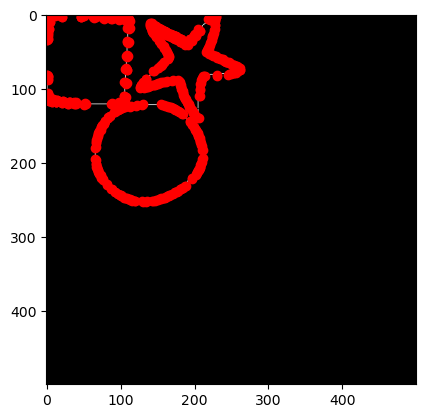

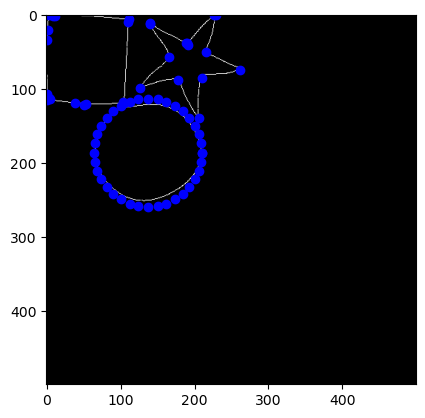

In [26]:
import cv2
import numpy as np
import svgwrite
import cairosvg
import matplotlib.pyplot as plt

colours = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# 1. Reading CSV I/O for Shapes
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def write_csv(output_path, shapes):
    with open(output_path, 'w') as f:
        for i, shape in enumerate(shapes):
            if isinstance(shape, dict):
                if shape['type'] == 'circle':
                    f.write(f"{i},circle,{shape['center'][0]},{shape['center'][1]},{shape['radius']}\n")
                elif shape['type'] == 'ellipse':
                    f.write(f"{i},ellipse,{','.join(map(str, shape['params']))}\n")
            else:  # Assuming it's a numpy array of points
                for point in shape:
                    f.write(f"{i},{point[0]},{point[1]}\n")

# 2. Plot Points on Image
def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

# 3. Preprocessing Image
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

# 4. Find and Classify Contours
def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

# 5. Regularizing Shapes
def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape:  # Only process recognized shapes
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

# 6. Detecting and Fitting Shapes
def detect_straight_lines(points, threshold=0.1):
    lines = []
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        if np.linalg.norm(p2 - p1) < threshold:
            continue
        lines.append((p1, p2))
    return lines

def fit_circle(points):
    x = points[:, 0]
    y = points[:, 1]
    A = np.c_[x, y, np.ones(x.shape)]
    B = x**2 + y**2
    params = np.linalg.lstsq(A, B, rcond=None)[0]
    center = (params[0] / 2, params[1] / 2)
    radius = np.sqrt(center[0]**2 + center[1]**2 + params[2])
    return {'type': 'circle', 'center': center, 'radius': radius}

def fit_ellipse(points):
    x = points[:, 0]
    y = points[:, 1]
    D = np.c_[x**2, x * y, y**2, x, y, np.ones(len(x))]
    S = np.dot(D.T, D)
    C = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            C[i, j] = S[i, j] if i == j else S[i, j] / (i + j + 1)
    eigvals, eigvecs = np.linalg.eig(C)
    params = eigvecs[:, np.argmin(eigvals)]
    return {'type': 'ellipse', 'params': params}

def detect_rectangle(points):
    rect_points = []
    for i in range(len(points)):
        p1 = points[i]
        p2 = points[(i + 1) % len(points)]
        p3 = points[(i + 2) % len(points)]
        angle = np.arccos(np.clip(np.dot(p2 - p1, p3 - p2) / (np.linalg.norm(p2 - p1) * np.linalg.norm(p3 - p2)), -1, 1))
        if np.isclose(angle, np.pi / 2, atol=0.1):
            rect_points.append((p1, p2, p3))
    return np.array(rect_points)

def detect_regular_polygon(points):
    num_sides = len(points)
    if num_sides < 3:
        return False
    side_lengths = [np.linalg.norm(points[i] - points[(i + 1) % num_sides]) for i in range(num_sides)]
    angles = [np.arccos(np.clip(np.dot(points[i] - points[(i - 1) % num_sides], points[(i + 1) % num_sides] - points[i]) /
                                (np.linalg.norm(points[i] - points[(i - 1) % num_sides]) * np.linalg.norm(points[(i + 1) % num_sides] - points[i])), -1, 1)) for i in range(num_sides)]
    return np.allclose(side_lengths, side_lengths[0]) and np.allclose(angles, angles[0])

def detect_star_shape(points):
    centroid = np.mean(points, axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    return np.allclose(distances, distances[0], rtol=0.1)

# 7. Exploring Symmetry in Curves
def check_reflectional_symmetry(points):
    centroid = np.mean(points, axis=0)
    mirrored_points = 2 * centroid - points
    return np.all(np.isclose(np.sort(points, axis=0), np.sort(mirrored_points, axis=0)))

# 8. Completing Incomplete Curves
def complete_curves(points):
    completed = points.copy()
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        if np.linalg.norm(p2 - p1) > 0.1:
            completed = np.vstack((completed, (p1 + p2) / 2))
    return completed

# 9. Visualization using SVG
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 10  # Increased padding for better visibility
    W, H = int(W + padding), int(H + padding)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', size=(W, H), shape_rendering='crispEdges')
    
    for i, path in enumerate(paths_XYs):
        path_data = []
        for contour in path:
            path_data.append('M {},{}'.format(contour[0][0], contour[0][1]))  # Move to start point
            for point in contour[1:]:
                path_data.append('L {},{}'.format(point[0][0], point[0][1]))  # Draw lines to each point
            path_data.append('Z')  # Close the path
        
        path_str = ' '.join(path_data)  # Combine path data into a single string
        dwg.add(dwg.path(d=path_str, stroke=colours[i % len(colours)], fill='none', stroke_width=3))
    
    dwg.save()

# 10. Integration of Matplotlib Plotting
def plot_contours_with_classification(image, contours, output_svg="output.svg"):
    plt.figure()
    plt.imshow(image, cmap='gray')
    for i, contour in enumerate(contours):
        shape = classify_shape(contour)
        regularized_shape = regularize_shape(contour, shape)
        color = (np.random.random(), np.random.random(), np.random.random())
        plt.plot(regularized_shape[:, 0, 0], regularized_shape[:, 0, 1], 'o', color=color, label=f'Shape {i}: {shape}')
    plt.legend()
    plt.show()

# Main Execution
csv_path =  r"C:\Users\KAJAL\Desktop\AdobeHackathon\problems\isolated.csv"
shapes = read_csv(csv_path)

# 11. Merging Functions for Comprehensive Workflow
def process_image_and_shapes(csv_path):
    shapes = read_csv(csv_path)
    image = plot_points_on_image(shapes)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    fitted_shapes = fit_shapes(image, contours)
    plot_contours_with_classification(image, fitted_shapes)
    polylines2svg(fitted_shapes, "output.svg")

process_image_and_shapes(csv_path)

import tkinter as tk
from tkinter import filedialog, messagebox
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Your previously defined functions here...

def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        csv_path_var.set(file_path)
        process_image_and_shapes(file_path)
    else:
        messagebox.showwarning("File Selection", "No file selected!")

def process_image_and_shapes_gui():
    file_path = csv_path_var.get()
    if not file_path:
        messagebox.showwarning("File Selection", "Please select a CSV file first!")
        return
    
    shapes = read_csv(file_path)
    image = plot_points_on_image(shapes)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    fitted_shapes = fit_shapes(image, contours)
    
    # Display original image with contours
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    for i, contour in enumerate(contours):
        ax.plot(contour[:, 0, 0], contour[:, 0, 1], 'o', color='red', label=f'Shape {i}')
    canvas1 = FigureCanvasTkAgg(fig, master=root)
    canvas1.draw()
    canvas1.get_tk_widget().grid(row=3, column=0)

    # Display regularized shapes
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    for i, contour in enumerate(fitted_shapes):
        ax.plot(contour[:, 0, 0], contour[:, 0, 1], 'o', color='blue', label=f'Shape {i}')
    canvas2 = FigureCanvasTkAgg(fig, master=root)
    canvas2.draw()
    canvas2.get_tk_widget().grid(row=3, column=1)

    # Save regularized shapes to SVG
    polylines2svg(fitted_shapes, "output.svg")
    messagebox.showinfo("SVG Export", "Regularized shapes exported to output.svg")

# Main GUI window
root = tk.Tk()
root.title("Shape Detection and Regularization")

# CSV file path variable
csv_path_var = tk.StringVar()

# File selection button
select_file_btn = tk.Button(root, text="Select CSV File", command=select_file)
select_file_btn.grid(row=0, column=0, padx=10, pady=10)

# Process and visualize button
process_btn = tk.Button(root, text="Process Image and Shapes", command=process_image_and_shapes_gui)
process_btn.grid(row=1, column=0, padx=10, pady=10)

# Display area for images
display_frame = tk.Frame(root)
display_frame.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

# Start the GUI loop
root.mainloop()


In [20]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import Label
from PIL import Image, ImageTk
import cv2
import numpy as np
import svgwrite
import os

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:
            continue

        shape = classify_shape(contour)
        if shape:
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

def save_as_svg(regularized_shapes, filename='output.svg'):
    dwg = svgwrite.Drawing(filename, profile='tiny')

    for shape in regularized_shapes:
        points = [(float(point[0][0]), float(point[0][1])) for point in shape]
        dwg.add(dwg.polygon(points, fill='none', stroke='black'))

    dwg.save()

def process_csv(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)
    return image, regularized_shapes, path_XYs  # Return original data for CSV saving

def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        process_and_display(file_path)

def process_and_display(csv_path):
    image, regularized_shapes, original_data = process_csv(csv_path)

    # Save as SVG
    save_as_svg(regularized_shapes)

    # Save the processed image as a temporary file
    temp_image_path = "output.png"
    cv2.imwrite(temp_image_path, image)

    # Display the original image
    orig_img = Image.open(csv_path)  # Display original CSV path as image
    orig_img = orig_img.resize((250, 250))  # Resize to fit in the GUI
    orig_img_tk = ImageTk.PhotoImage(orig_img)
    label_orig_img.config(image=orig_img_tk)
    label_orig_img.image = orig_img_tk

    # Display the processed image
    proc_img = Image.open(temp_image_path)
    proc_img = proc_img.resize((250, 250))  # Resize to fit in the GUI
    proc_img_tk = ImageTk.PhotoImage(proc_img)
    label_proc_img.config(image=proc_img_tk)
    label_proc_img.image = proc_img_tk

    messagebox.showinfo("Processing Complete", "Image has been processed and SVG saved.")

def save_svg():
    svg_filename = filedialog.asksaveasfilename(defaultextension=".svg", filetypes=[("SVG files", "*.svg")])
    if svg_filename:
        os.rename("output.svg", svg_filename)
        messagebox.showinfo("SVG Saved", f"SVG file has been saved as {svg_filename}")

def save_csv(original_data):
    csv_filename = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if csv_filename:
        np.savetxt(csv_filename, original_data, delimiter=',')
        messagebox.showinfo("CSV Saved", f"CSV file has been saved as {csv_filename}")

# Setup tkinter GUI
root = tk.Tk()
root.title("CSV to Image & SVG Processor")

frame = tk.Frame(root)
frame.pack(pady=20, padx=20)

btn_select = tk.Button(frame, text="Select CSV File", command=select_file)
btn_select.pack(pady=10)

btn_save_svg = tk.Button(frame, text="Save SVG", command=save_svg)
btn_save_svg.pack(pady=10)

btn_save_csv = tk.Button(frame, text="Save CSV", command=lambda: save_csv(original_data))
btn_save_csv.pack(pady=10)

label_orig_img = Label(frame)
label_orig_img.pack(pady=10)

label_proc_img = Label(frame)
label_proc_img.pack(pady=10)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KAJAL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3764513617.py", line 109, in select_file
    process_and_display(file_path)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3764513617.py", line 112, in process_and_display
    image, regularized_shapes, original_data = process_csv(csv_path)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3764513617.py", line 99, in process_csv
    path_XYs = read_csv(csv_path)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3764513617.py", line 11, in read_csv
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
  File "C:\Users\KAJAL\anaconda3\lib\site-packages\numpy\lib\npyio.py", line 2291, in genfromtxt
    raise ValueError(errmsg)
ValueError: Some errors were detected !
    Line #40 (got 5 columns instead of 3)
    Line #41 (got 8

In [16]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import Label
from PIL import Image, ImageTk
import cv2
import numpy as np
import svgwrite
import os

# Reading CSV and processing points
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Plotting points on an image
def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

# Preprocessing the image (blurring and edge detection)
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

# Finding contours
def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Classifying shapes
def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

# Regularizing shapes to standard geometrical forms
def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

# Fitting regularized shapes on the image
def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:
            continue

        shape = classify_shape(contour)
        if shape:
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

# Saving the regularized shapes as an SVG file
def save_as_svg(regularized_shapes, filename='output.svg'):
    dwg = svgwrite.Drawing(filename, profile='tiny')

    for shape in regularized_shapes:
        points = [(float(point[0][0]), float(point[0][1])) for point in shape]
        dwg.add(dwg.polygon(points, fill='none', stroke='black'))

    dwg.save()

# Process CSV to generate an image and find shapes
def process_csv(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)
    return image, regularized_shapes, path_XYs  # Return original data for CSV saving

# GUI Functions
def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        process_and_display(file_path)

def process_and_display(csv_path):
    image, regularized_shapes, original_data = process_csv(csv_path)

    # Save as SVG
    save_as_svg(regularized_shapes)

    # Save the processed image as a temporary file
    temp_image_path = "output.png"
    cv2.imwrite(temp_image_path, image)

    # Display the original image
    orig_img = Image.open(csv_path)  # Display original CSV path as image
    orig_img = orig_img.resize((250, 250))  # Resize to fit in the GUI
    orig_img_tk = ImageTk.PhotoImage(orig_img)
    label_orig_img.config(image=orig_img_tk)
    label_orig_img.image = orig_img_tk

    # Display the processed image
    proc_img = Image.open(temp_image_path)
    proc_img = proc_img.resize((250, 250))  # Resize to fit in the GUI
    proc_img_tk = ImageTk.PhotoImage(proc_img)
    label_proc_img.config(image=proc_img_tk)
    label_proc_img.image = proc_img_tk

    messagebox.showinfo("Processing Complete", "Image has been processed and SVG saved.")

def save_svg():
    svg_filename = filedialog.asksaveasfilename(defaultextension=".svg", filetypes=[("SVG files", "*.svg")])
    if svg_filename:
        os.rename("output.svg", svg_filename)
        messagebox.showinfo("SVG Saved", f"SVG file has been saved as {svg_filename}")

def save_csv(original_data):
    csv_filename = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if csv_filename:
        np.savetxt(csv_filename, original_data, delimiter=',')
        messagebox.showinfo("CSV Saved", f"CSV file has been saved as {csv_filename}")

# Setup tkinter GUI
root = tk.Tk()
root.title("CSV to Image & SVG Processor")

frame = tk.Frame(root)
frame.pack(pady=20, padx=20)

btn_select = tk.Button(frame, text="Select CSV File", command=select_file)
btn_select.pack(pady=10)

btn_save_svg = tk.Button(frame, text="Save SVG", command=save_svg)
btn_save_svg.pack(pady=10)

btn_save_csv = tk.Button(frame, text="Save CSV", command=lambda: save_csv(original_data))
btn_save_csv.pack(pady=10)

label_orig_img = Label(frame)
label_orig_img.pack(pady=10)

label_proc_img = Label(frame)
label_proc_img.pack(pady=10)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KAJAL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\2603021240.py", line 119, in select_file
    process_and_display(file_path)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\2603021240.py", line 132, in process_and_display
    orig_img = Image.open(csv_path)  # Display original CSV path as image
  File "C:\Users\KAJAL\anaconda3\lib\site-packages\PIL\Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)
PIL.UnidentifiedImageError: cannot identify image file 'C:/Users/KAJAL/Desktop/AdobeHackathon/problems/isolated.csv'


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KAJAL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3144513446.py", line 159, in select_file
    process_image_and_shapes_gui(file_path)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3144513446.py", line 192, in process_image_and_shapes_gui
    write_csv("output_shapes.csv", fitted_shapes)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3144513446.py", line 33, in write_csv
    f.write(f"{i},{point[0]},{point[1]}\n")
IndexError: index 1 is out of bounds for axis 0 with size 1
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KAJAL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\3144513446.py", line 159, in select_file
    process_image_and_shapes_gui(file_

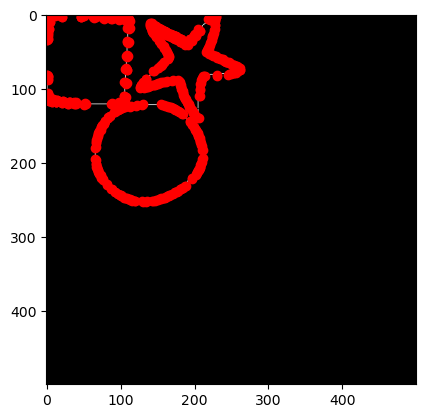

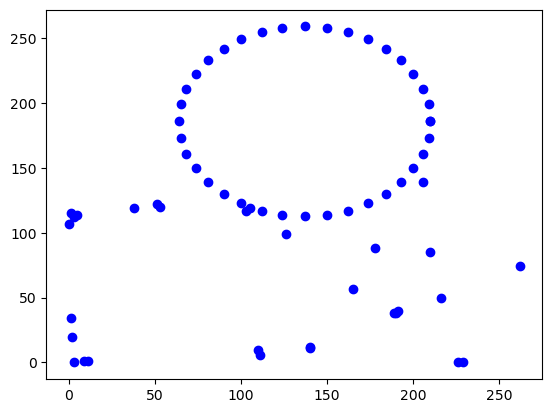

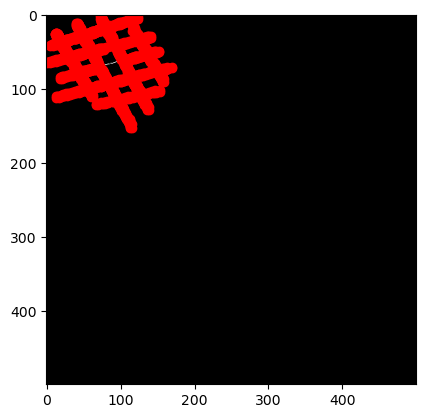

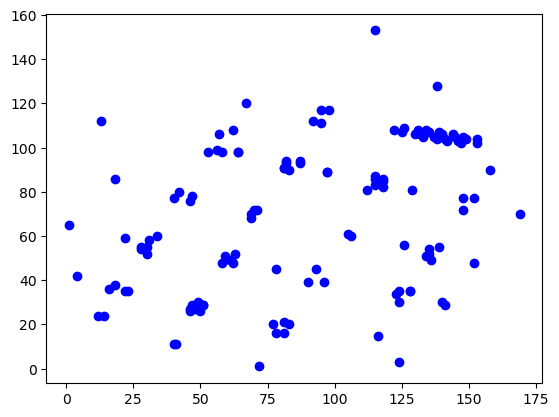

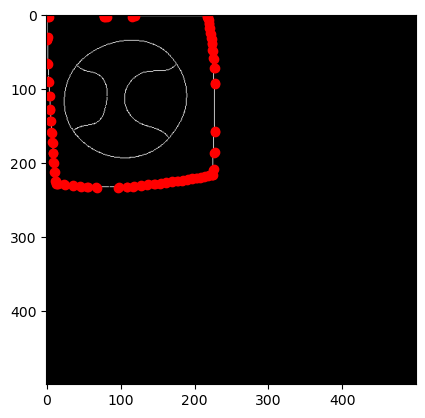

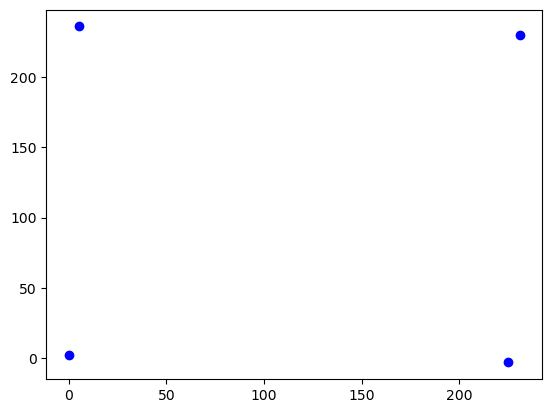

In [21]:
import cv2
import numpy as np
import svgwrite
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog, messagebox, StringVar, Entry, Button, Label
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

colours = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# 1. Reading CSV I/O for Shapes
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def write_csv(output_path, shapes):
    with open(output_path, 'w') as f:
        for i, shape in enumerate(shapes):
            if isinstance(shape, dict):
                if shape['type'] == 'circle':
                    f.write(f"{i},circle,{shape['center'][0]},{shape['center'][1]},{shape['radius']}\n")
                elif shape['type'] == 'ellipse':
                    f.write(f"{i},ellipse,{','.join(map(str, shape['params']))}\n")
            else:  # Assuming it's a numpy array of points
                for point in shape:
                    f.write(f"{i},{point[0]},{point[1]}\n")

# 2. Plot Points on Image
def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                image[y, x] = 255
    return image

# 3. Preprocessing Image
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

# 4. Find and Classify Contours
def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

# 5. Regularizing Shapes
def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:  # Too few points to fit an ellipse
            continue

        shape = classify_shape(contour)
        if shape:  # Only process recognized shapes
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

# 6. Visualization using SVG
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', size=(W, H), shape_rendering='crispEdges')
    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        for contour in path:
            path_data = [("M", *contour[0])]
            for point in contour[1:]:
                path_data.append(("L", *point))
            path_data.append(("Z",))  # Close the path

            # Convert path_data to SVG path string
            path_str = " ".join([f"{cmd} {x},{y}" for cmd, x, y in path_data if cmd != "Z"] + ["Z"])
            group.add(dwg.path(d=path_str, stroke=colours[i % len(colours)], fill='none', stroke_width=3))

    dwg.add(group)
    dwg.save()

# 7. Integration of Matplotlib Plotting
def plot_contours_with_classification(image, contours):
    plt.figure()
    plt.imshow(image, cmap='gray')
    for i, contour in enumerate(contours):
        shape = classify_shape(contour)
        regularized_shape = regularize_shape(contour, shape)
        color = (np.random.random(), np.random.random(), np.random.random())
        plt.plot(regularized_shape[:, 0, 0], regularized_shape[:, 0, 1], 'o', color=color, label=f'Shape {i}: {shape}')
    plt.legend()
    plt.show()

# Main Execution
def process_image_and_shapes(csv_path):
    shapes = read_csv(csv_path)
    image = plot_points_on_image(shapes)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    fitted_shapes = fit_shapes(image, contours)
    plot_contours_with_classification(image, fitted_shapes)
    polylines2svg(fitted_shapes, "output.svg")
    return image, fitted_shapes

# GUI Implementation
def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        csv_path_var.set(file_path)
        process_image_and_shapes_gui(file_path)

def process_image_and_shapes_gui(file_path):
    if not file_path:
        messagebox.showwarning("File Selection", "Please select a CSV file first!")
        return
    
    shapes = read_csv(file_path)
    image = plot_points_on_image(shapes)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    fitted_shapes = fit_shapes(image, contours)

    # Display original image with contours
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    for i, contour in enumerate(contours):
        ax.plot(contour[:, 0, 0], contour[:, 0, 1], 'o', color='red', label=f'Shape {i}')
    canvas1 = FigureCanvasTkAgg(fig, master=root)
    canvas1.draw()
    canvas1.get_tk_widget().grid(row=3, column=0)

    # Display regularized shapes
    fig, ax = plt.subplots()
    for i, contour in enumerate(fitted_shapes):
        ax.plot(contour[:, 0, 0], contour[:, 0, 1], 'o', color='blue', label=f'Shape {i}')
    canvas2 = FigureCanvasTkAgg(fig, master=root)
    canvas2.draw()
    canvas2.get_tk_widget().grid(row=4, column=0)

    # Save the modified shapes and SVG
    output_image_path = "output_image.png"
    cv2.imwrite(output_image_path, image)
    write_csv("output_shapes.csv", fitted_shapes)

    messagebox.showinfo("Processing Complete", "Shapes processed, SVG generated, and output files created!")

# Setting up the GUI
root = Tk()
root.title("Shape Detection and SVG Generation")

# Input CSV path label and entry
Label(root, text="Select CSV File:").grid(row=0, column=0, padx=10, pady=10)
csv_path_var = StringVar()
csv_path_entry = Entry(root, textvariable=csv_path_var, width=50)
csv_path_entry.grid(row=0, column=1, padx=10, pady=10)

# Browse button
browse_button = Button(root, text="Browse", command=select_file)
browse_button.grid(row=0, column=2, padx=10, pady=10)

# Process button
process_button = Button(root, text="Process", command=lambda: process_image_and_shapes_gui(csv_path_var.get()))
process_button.grid(row=1, column=0, columnspan=3, padx=10, pady=20)

# Start the Tkinter event loop
root.mainloop()


In [23]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import Label
from PIL import Image, ImageTk
import cv2
import numpy as np
import svgwrite
import os

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_points_on_image(points, img_size=(500, 500)):
    image = np.zeros(img_size, dtype=np.uint8)
    for shape in points:
        for contour in shape:
            for point in contour:
                x, y = int(point[0]), int(point[1])
                if 0 <= x < img_size[1] and 0 <= y < img_size[0]:  # Check bounds
                    image[y, x] = 255
    return image

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def classify_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
    elif len(approx) > 4:
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (peri ** 2)
        if circularity > 0.8:
            return "Circle"
        else:
            return "Irregular"
    return "Irregular"

def regularize_shape(contour, shape):
    if shape == "Triangle":
        return contour
    elif shape == "Square" or shape == "Rectangle":
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box.reshape((-1, 1, 2))
    elif shape == "Circle":
        center, radius = cv2.minEnclosingCircle(contour)
        center = (int(center[0]), int(center[1]))
        radius = int(radius)
        circle_approx = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
        return circle_approx.reshape((-1, 1, 2))
    else:
        return cv2.approxPolyDP(contour, 5, True)

def fit_shapes(image, contours):
    regularized_shapes = []
    for contour in contours:
        if len(contour) < 5:
            continue

        shape = classify_shape(contour)
        if shape:
            regularized_contour = regularize_shape(contour, shape)
            regularized_shapes.append(regularized_contour)
    
    return regularized_shapes

def save_as_svg(regularized_shapes, filename='output.svg'):
    dwg = svgwrite.Drawing(filename, profile='tiny')

    for shape in regularized_shapes:
        points = [(float(point[0][0]), float(point[0][1])) for point in shape]
        dwg.add(dwg.polygon(points, fill='none', stroke='black'))

    dwg.save()

def process_csv(csv_path):
    path_XYs = read_csv(csv_path)
    image = plot_points_on_image(path_XYs)
    edges = preprocess_image(image)
    contours = find_contours(edges)
    regularized_shapes = fit_shapes(image, contours)
    return image, regularized_shapes, path_XYs  # Return original data for CSV saving

def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        process_and_display(file_path)

def process_and_display(csv_path):
    global original_data  # Make original_data global to access in save_csv
    image, regularized_shapes, original_data = process_csv(csv_path)

    # Save as SVG
    save_as_svg(regularized_shapes)

    # Save the processed image as a temporary file
    temp_image_path = "output.png"
    cv2.imwrite(temp_image_path, image)

    # Display the original image
    orig_img = Image.open(csv_path)  # Display original CSV path as image
    orig_img = orig_img.resize((250, 250))  # Resize to fit in the GUI
    orig_img_tk = ImageTk.PhotoImage(orig_img)
    label_orig_img.config(image=orig_img_tk)
    label_orig_img.image = orig_img_tk

    # Display the processed image
    proc_img = Image.open(temp_image_path)
    proc_img = proc_img.resize((250, 250))  # Resize to fit in the GUI
    proc_img_tk = ImageTk.PhotoImage(proc_img)
    label_proc_img.config(image=proc_img_tk)
    label_proc_img.image = proc_img_tk

    messagebox.showinfo("Processing Complete", "Image has been processed and SVG saved.")

def save_svg():
    svg_filename = filedialog.asksaveasfilename(defaultextension=".svg", filetypes=[("SVG files", "*.svg")])
    if svg_filename:
        os.rename("output.svg", svg_filename)
        messagebox.showinfo("SVG Saved", f"SVG file has been saved as {svg_filename}")

def save_csv(original_data):
    csv_filename = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if csv_filename:
        np.savetxt(csv_filename, original_data, delimiter=',')
        messagebox.showinfo("CSV Saved", f"CSV file has been saved as {csv_filename}")

# Setup tkinter GUI
root = tk.Tk()
root.title("CSV to Image & SVG Processor")

frame = tk.Frame(root)
frame.pack(pady=20, padx=20)

btn_select = tk.Button(frame, text="Select CSV File", command=select_file)
btn_select.pack(pady=10)

btn_save_svg = tk.Button(frame, text="Save SVG", command=save_svg)
btn_save_svg.pack(pady=10)

btn_save_csv = tk.Button(frame, text="Save CSV", command=lambda: save_csv(original_data))
btn_save_csv.pack(pady=10)

label_orig_img = Label(frame)
label_orig_img.pack(pady=10)

label_proc_img = Label(frame)
label_proc_img.pack(pady=10)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KAJAL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\2645705293.py", line 110, in select_file
    process_and_display(file_path)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\2645705293.py", line 124, in process_and_display
    orig_img = Image.open(csv_path)  # Display original CSV path as image
  File "C:\Users\KAJAL\anaconda3\lib\site-packages\PIL\Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)
PIL.UnidentifiedImageError: cannot identify image file 'C:/Users/KAJAL/Desktop/AdobeHackathon/problems/frag0.csv'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KAJAL\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\KAJAL\AppData\Local\Temp\ipykernel_367220\2645705293.py", line 110, in select_f